Martín Amado - 19020
Juan Pablo Pineda - 19087
Laura Tamath - 19365

referencia para análisis de datos: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#4.-Missing-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.stats.diagnostic as diag
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
import sklearn.preprocessing
import random
import graphviz
## import pyclustertend 
from sklearn.cluster import Birch
import matplotlib.cm as cm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

## Análisis  exploratorio
Explicación de hallazgos y conclusiones -Laura

In [2]:
data = pd.read_csv('./train.csv', encoding = "latin1")
file = open('cuantitativas.txt', 'r')
quant= file.read().splitlines()
file = open('cualitativas.txt', 'r')
quali= file.read().splitlines()

In [3]:
#Variables cuantitativas
data[quant].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


LotFrontage :  Kurtosis: 17.375300497599614 Asimetría: 2.160865994705543 

LotArea :  Kurtosis: 202.5437927513529 Asimetría: 12.195142125084478 

MasVnrArea :  Kurtosis: 10.04360232122905 Asimetría: 2.6663261001607435 

BsmtFinSF1 :  Kurtosis: 11.076089857631942 Asimetría: 1.6837708962341815 

BsmtFinSF2 :  Kurtosis: 20.04041549471293 Asimetría: 4.250888017057445 

BsmtUnfSF :  Kurtosis: 0.4692620789683075 Asimetría: 0.9193227015582005 

TotalBsmtSF :  Kurtosis: 13.201041630635025 Asimetría: 1.522688086978629 

1stFlrSF :  Kurtosis: 5.722076026587489 Asimetría: 1.3753417421837937 

2ndFlrSF :  Kurtosis: -0.5556767272864769 Asimetría: 0.8121942731961613 

LowQualFinSF :  Kurtosis: 82.945932358931 Asimetría: 9.002080417658552 

GrLivArea :  Kurtosis: 4.874265760253215 Asimetría: 1.365155954773434 

BsmtFullBath :  Kurtosis: -0.8403341716305701 Asimetría: 0.5954540376067279 

BsmtHalfBath :  Kurtosis: 16.33643610470807 Asimetría: 4.0991856695420035 

FullBath :  Kurtosis: -0.8582173323828

C:\Users\juanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


OpenPorchSF :  Kurtosis: 8.457180405184337 Asimetría: 2.361911928568972 

EnclosedPorch :  Kurtosis: 10.39097160371135 Asimetría: 3.086696471376678 

3SsnPorch :  Kurtosis: 123.23517727268867 Asimetría: 10.293752357165413 

ScreenPorch :  Kurtosis: 18.371874098863685 Asimetría: 4.1179773827954875 

PoolArea :  Kurtosis: 222.500506832132 Asimetría: 14.813134660429398 

MiscVal :  Kurtosis: 698.6008400387273 Asimetría: 24.4516396173223 

SalePrice :  Kurtosis: 6.509812011089439 Asimetría: 1.880940746034036 



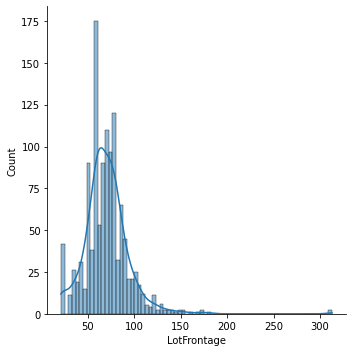

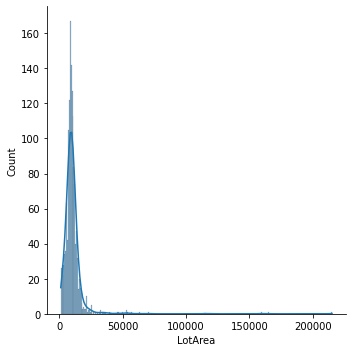

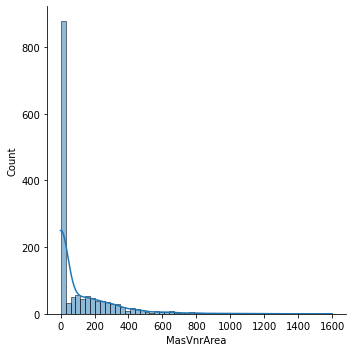

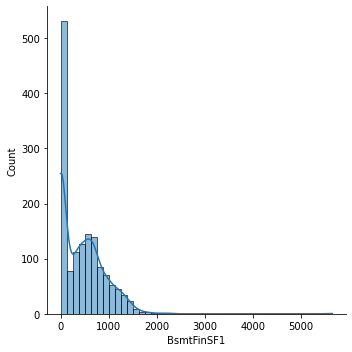

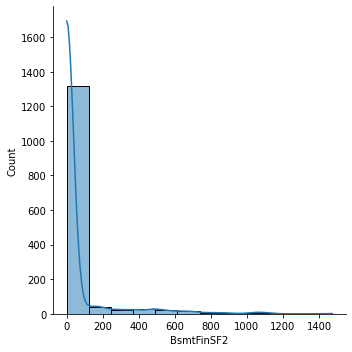

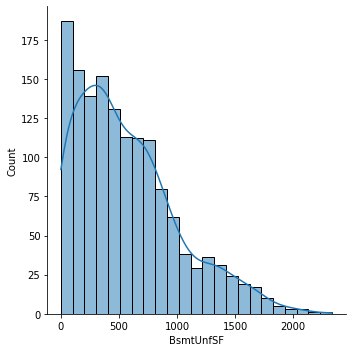

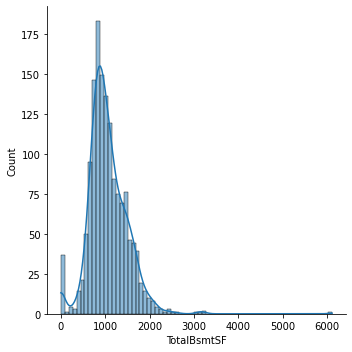

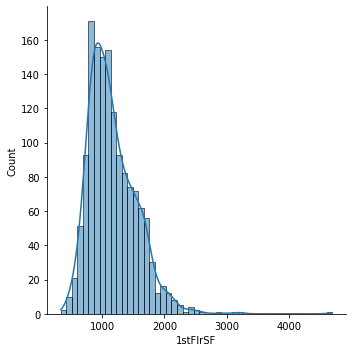

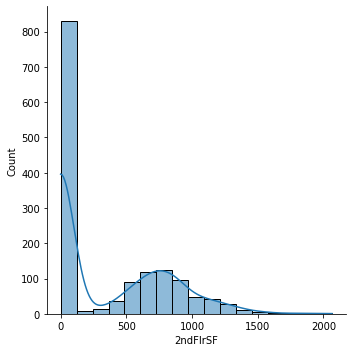

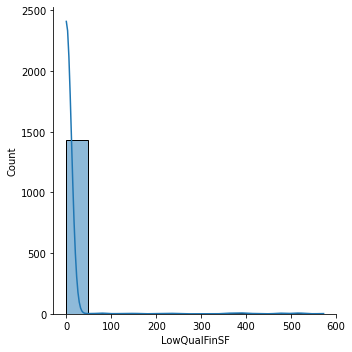

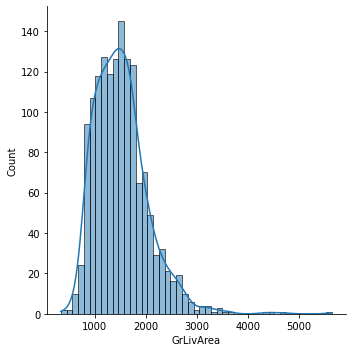

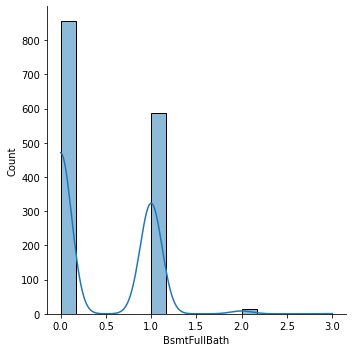

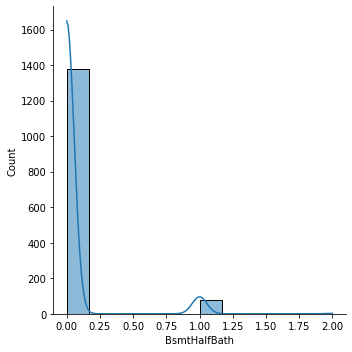

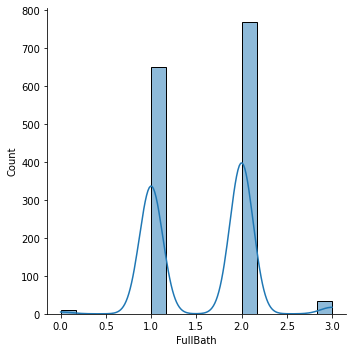

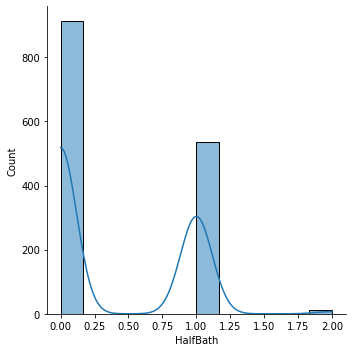

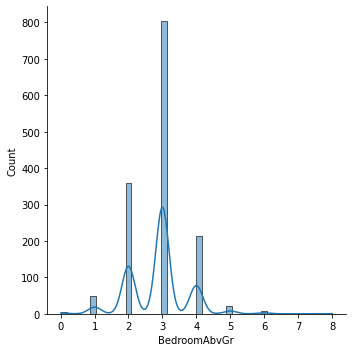

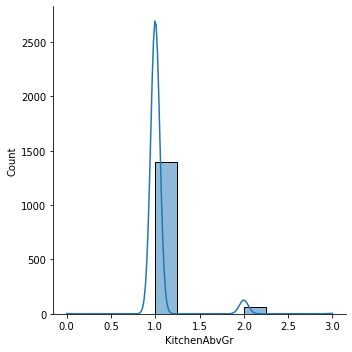

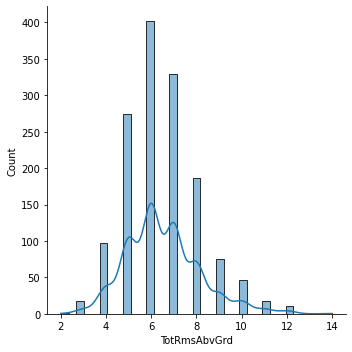

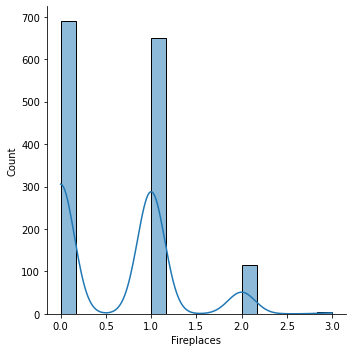

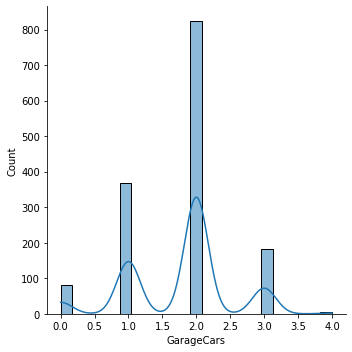

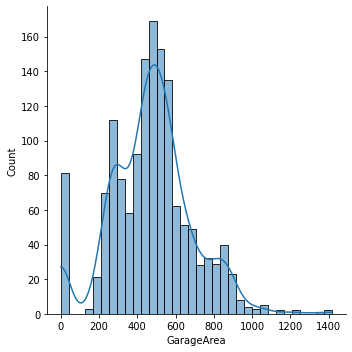

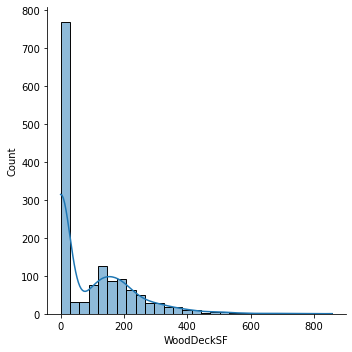

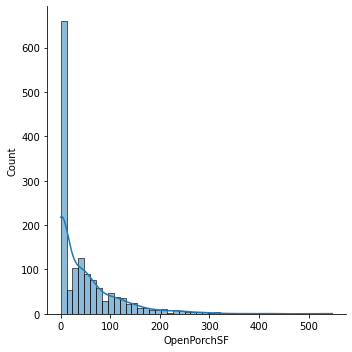

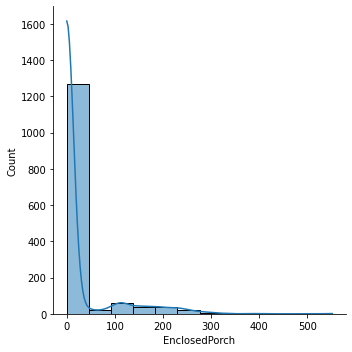

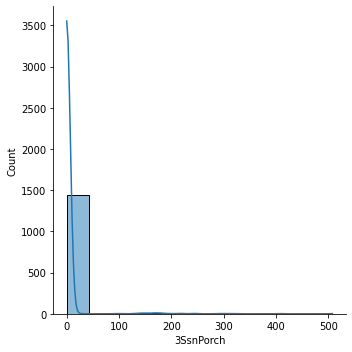

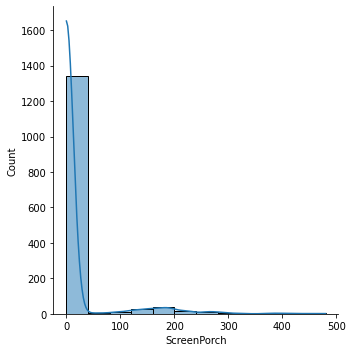

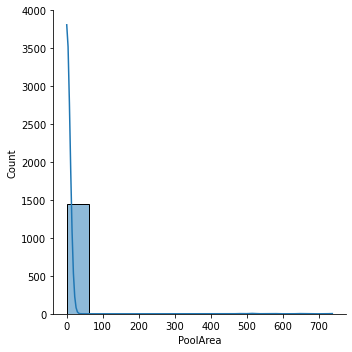

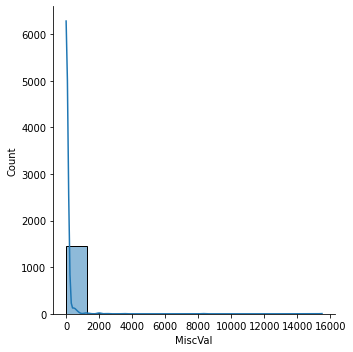

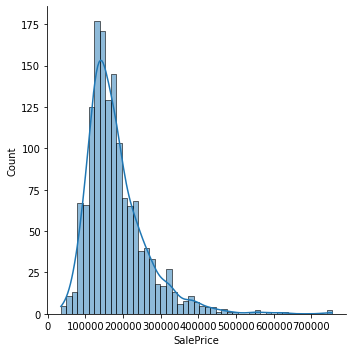

In [4]:
for var in quant:
    localData = data[var].dropna(how='all', axis=0)
  
    sns.displot(localData, kde=True)

    print( var, ':', ' Kurtosis:', stats.kurtosis(localData), 'Asimetría:', stats.skew(localData), '\n')

Id


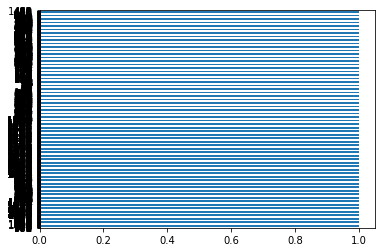

<Figure size 1440x360 with 0 Axes>

MSSubClass


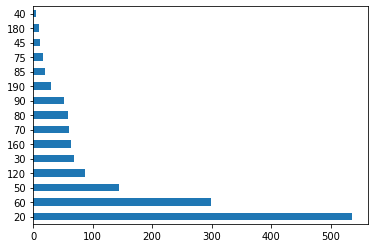

<Figure size 1440x360 with 0 Axes>

MSZoning


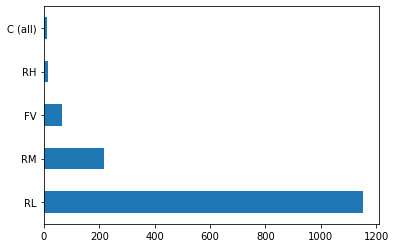

<Figure size 1440x360 with 0 Axes>

Street


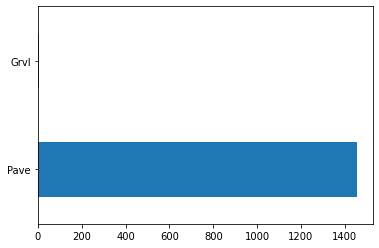

<Figure size 1440x360 with 0 Axes>

Alley


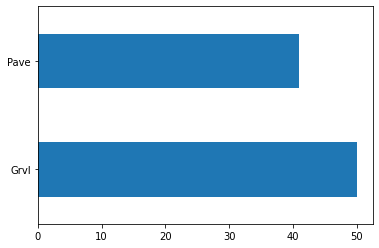

<Figure size 1440x360 with 0 Axes>

LotShape


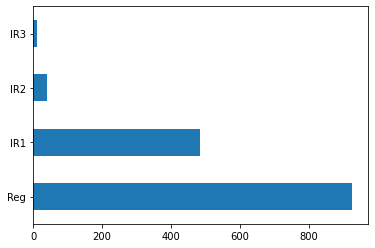

<Figure size 1440x360 with 0 Axes>

LandContour


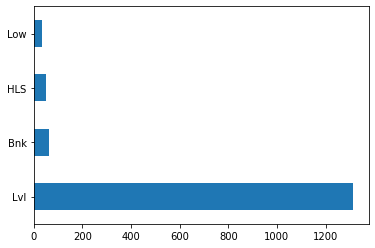

<Figure size 1440x360 with 0 Axes>

Utilities


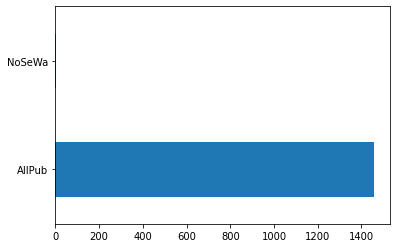

<Figure size 1440x360 with 0 Axes>

LotConfig


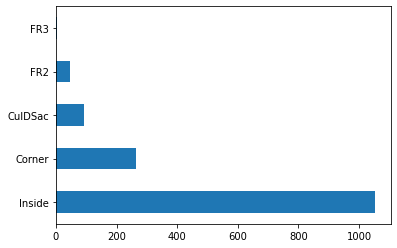

<Figure size 1440x360 with 0 Axes>

LandSlope


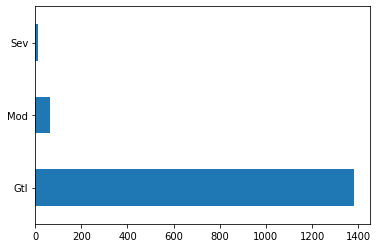

<Figure size 1440x360 with 0 Axes>

Neighborhood


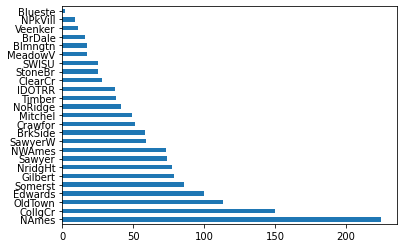

<Figure size 1440x360 with 0 Axes>

Condition1


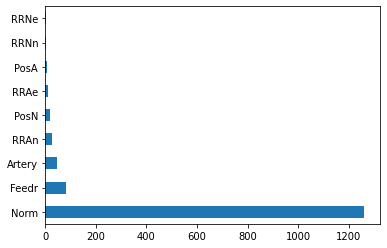

<Figure size 1440x360 with 0 Axes>

Condition2


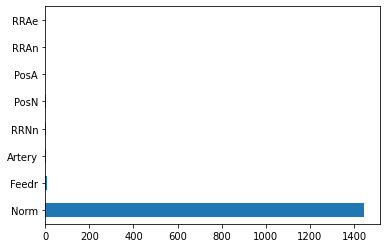

<Figure size 1440x360 with 0 Axes>

BldgType


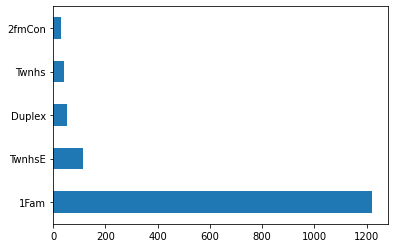

<Figure size 1440x360 with 0 Axes>

HouseStyle


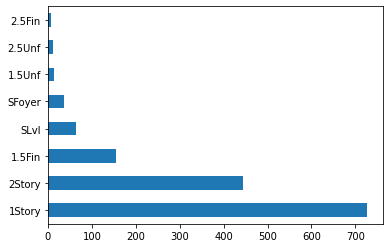

<Figure size 1440x360 with 0 Axes>

OverallQual


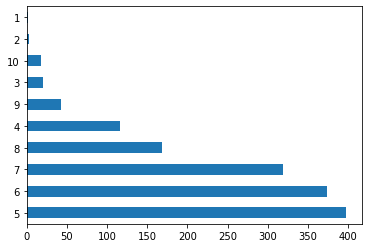

<Figure size 1440x360 with 0 Axes>

OverallCond


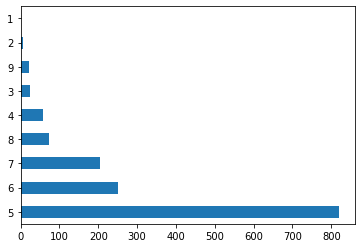

<Figure size 1440x360 with 0 Axes>

YearBuilt


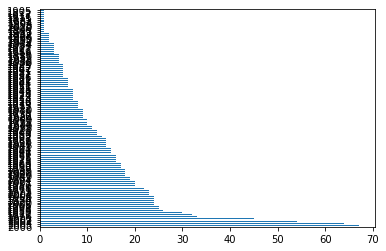

<Figure size 1440x360 with 0 Axes>

YearRemodAdd


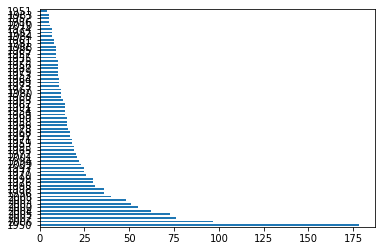

<Figure size 1440x360 with 0 Axes>

RoofStyle


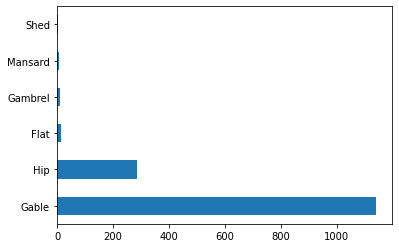

<Figure size 1440x360 with 0 Axes>

RoofMatl


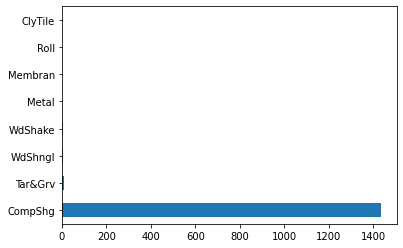

<Figure size 1440x360 with 0 Axes>

Exterior1st


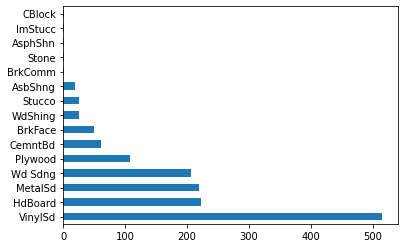

<Figure size 1440x360 with 0 Axes>

Exterior2nd


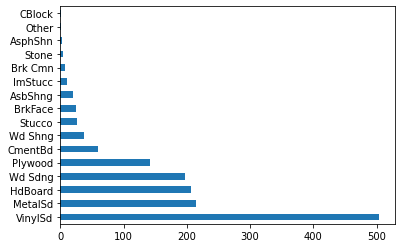

<Figure size 1440x360 with 0 Axes>

MasVnrType


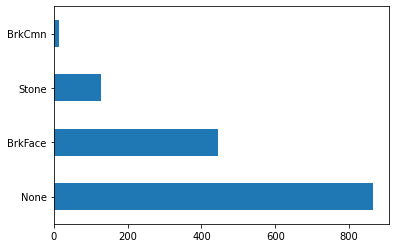

<Figure size 1440x360 with 0 Axes>

ExterQual


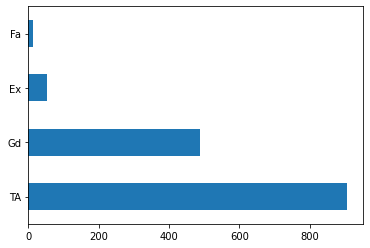

<Figure size 1440x360 with 0 Axes>

ExterCond


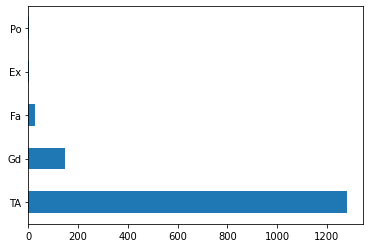

<Figure size 1440x360 with 0 Axes>

Foundation


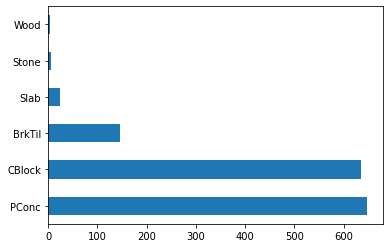

<Figure size 1440x360 with 0 Axes>

BsmtQual


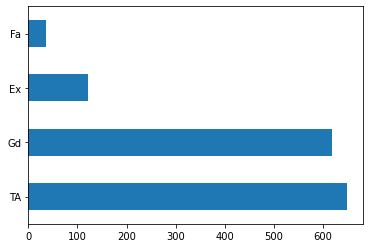

<Figure size 1440x360 with 0 Axes>

BsmtCond


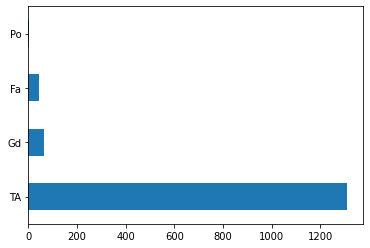

<Figure size 1440x360 with 0 Axes>

BsmtExposure


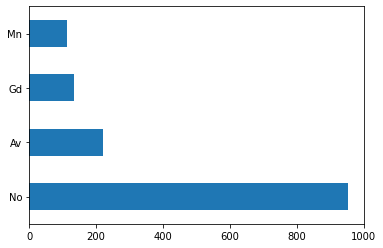

<Figure size 1440x360 with 0 Axes>

BsmtFinType1


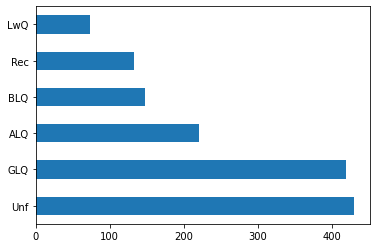

<Figure size 1440x360 with 0 Axes>

BsmtFinType2


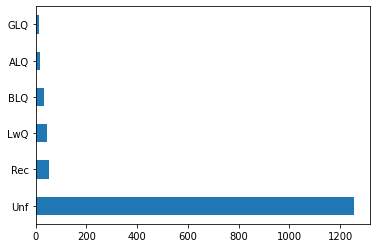

<Figure size 1440x360 with 0 Axes>

Heating


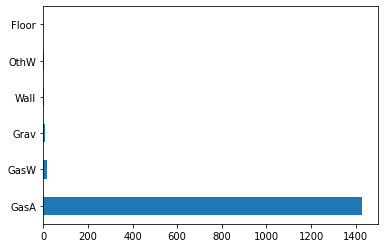

<Figure size 1440x360 with 0 Axes>

HeatingQC


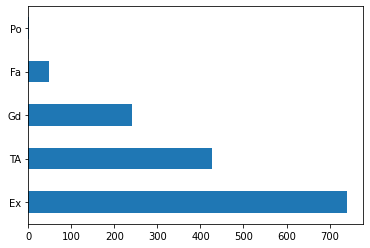

<Figure size 1440x360 with 0 Axes>

CentralAir


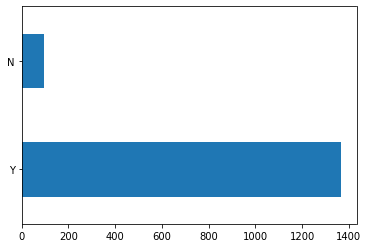

<Figure size 1440x360 with 0 Axes>

Electrical


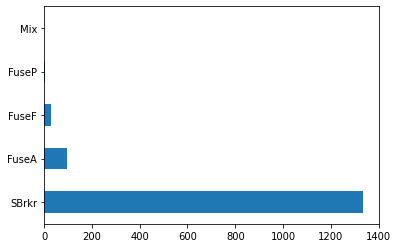

<Figure size 1440x360 with 0 Axes>

MoSold


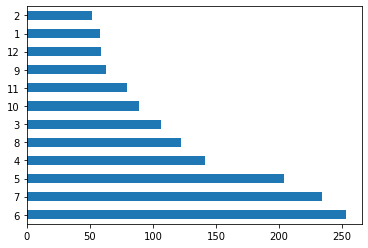

<Figure size 1440x360 with 0 Axes>

YrSold


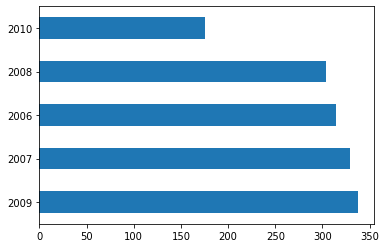

<Figure size 1440x360 with 0 Axes>

SaleType


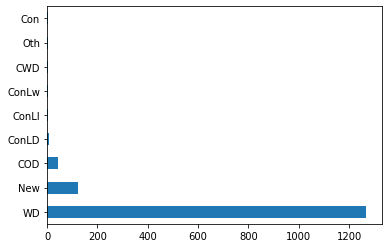

<Figure size 1440x360 with 0 Axes>

SaleCondition


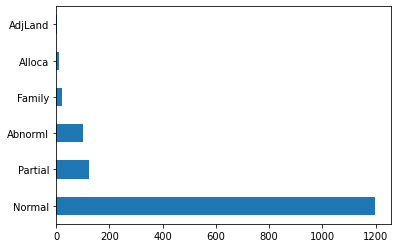

<Figure size 1440x360 with 0 Axes>

PoolQC


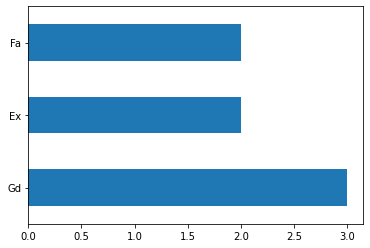

<Figure size 1440x360 with 0 Axes>

Fence


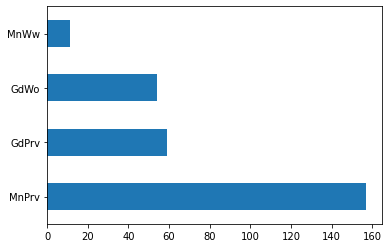

<Figure size 1440x360 with 0 Axes>

Functional


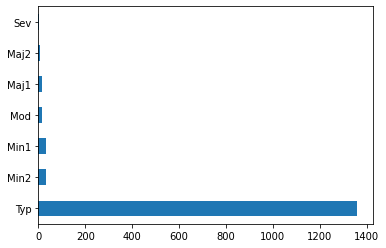

<Figure size 1440x360 with 0 Axes>

MiscFeature


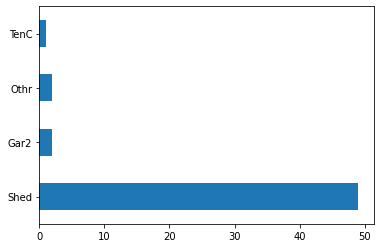

<Figure size 1440x360 with 0 Axes>

GarageQual


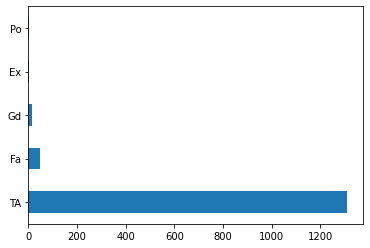

<Figure size 1440x360 with 0 Axes>

GarageCond


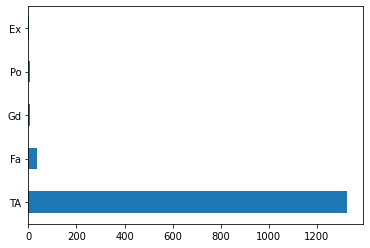

<Figure size 1440x360 with 0 Axes>

PavedDrive


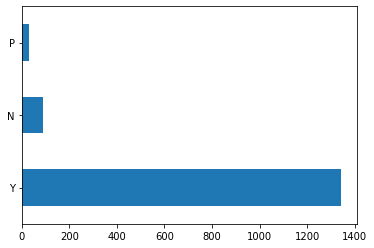

<Figure size 1440x360 with 0 Axes>

FireplaceQu


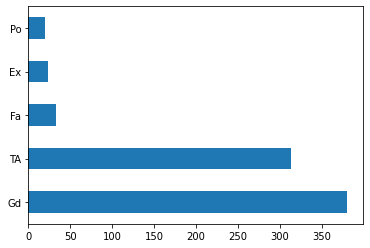

<Figure size 1440x360 with 0 Axes>

GarageType


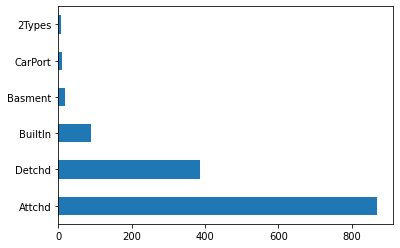

<Figure size 1440x360 with 0 Axes>

GarageYrBlt


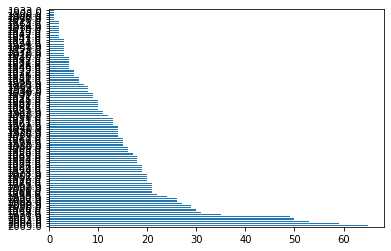

<Figure size 1440x360 with 0 Axes>

GarageFinish


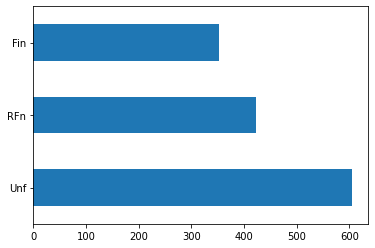

<Figure size 1440x360 with 0 Axes>

KitchenQual


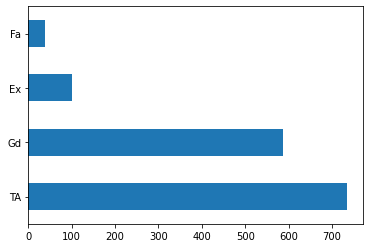

<Figure size 1440x360 with 0 Axes>

In [5]:
#Variables cualitativas
for var in quali:
  data[var].value_counts().plot(kind='barh')
  plt.figure(figsize=(20,5))
  print(var)
  plt.show()

In [6]:
# Variables de interes
print('\033[36m' + 'Kurtosis: %f' % data['SalePrice'].kurt())
print('\033[36m' + 'Asimetría: %f' % data['SalePrice'].skew())
data['SalePrice'].describe()

Kurtosis: 6.536282
Asimetría: 1.882876


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
stat,p = stats.shapiro(data[["SalePrice"]].dropna())
print('Prueba de Kolmogorov-Smirnov:\np=%f\n'% p)
ks_statistic, p_value = diag.lilliefors(data[["SalePrice"]].dropna())
print('Prueba de Lilliefors:\nks=%f\np=%f'%(ks_statistic,p_value))

Prueba de Kolmogorov-Smirnov:
p=0.000000

Prueba de Lilliefors:
ks=0.123685
p=0.001000


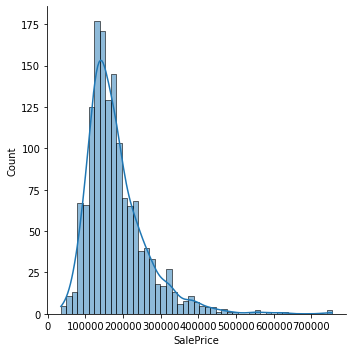

In [8]:
sns.displot(data['SalePrice'], kde=True)

<AxesSubplot:xlabel='SalePrice'>

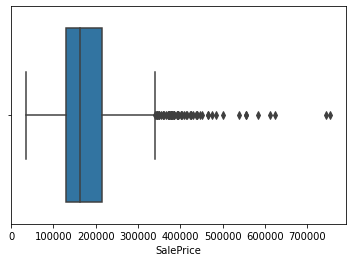

In [12]:
sns.boxplot(x=data["SalePrice"])

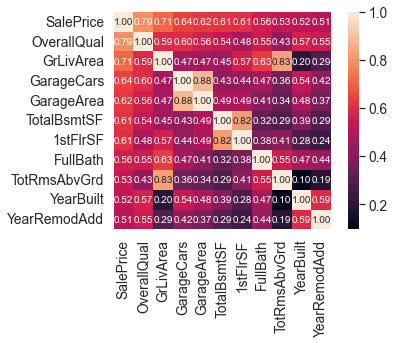

In [13]:
k = 11
corrmat = data.corr()
columns = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

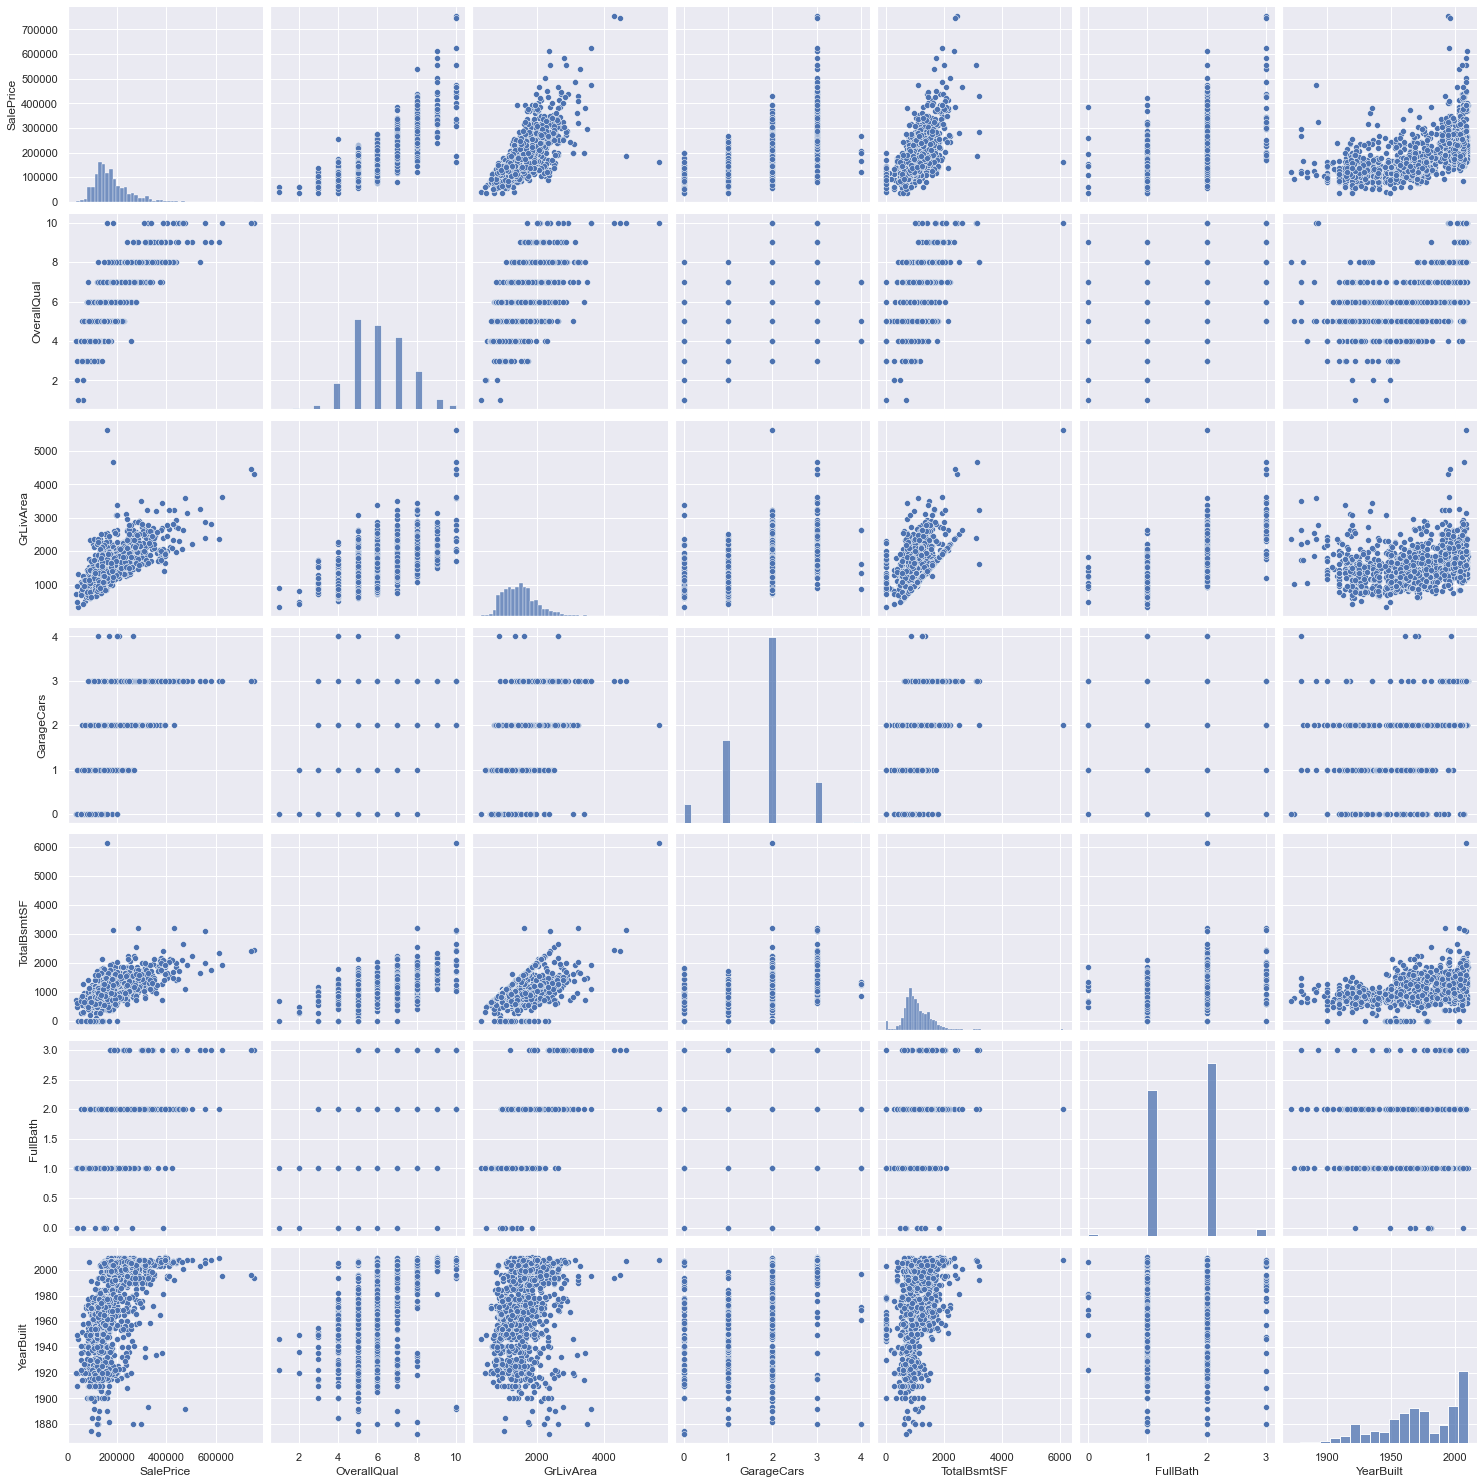

In [14]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[columns], height= 3)
plt.show()

### Análisis
Algo muy importante que se pudo notar, es que las variables toman en cuenta los cuartos sobre la tierra, no los que están en un nivel inferior, esto da paso a que se deduzca que la cantidad de los sótanos no son tan relecantes a comparación de los cuartos sobre la tierra. También es imporante mencionar que son pocas las variables que utilizan un valor numérico que puede convertirse a una cantidad monetaria. Sin embargo, la mayoría de las variables no se pueden clasificar como "mejor" o "peor" por ende, esto únicamente lo puede determinar la persona que quiere comprar un hogar. Y aunque es claro que existen variables que clasifican las paredes, la cimentación, los techos, entre otros; son estas a las que realemente hay que ponerles atención, ya que se pueden tomar en cuenta para estimar un valor a la propiedad. 
Las variables que más importancia tienen son las que nos indica si tiene características extras (con "extras" me refiero a las que no son indispensables para un hogar) como por ejemplo: garage extra, jardín, piscina, cancha, elevador, entre otros... ya que estas características pueden aumentar el precio de la vivienda de manera significativa. Pero esto no quiere decir que esta varible sea la única importante, ya que también hay que tomar en cuenta la calidad del hogar, la ubicación, el tipo de terreno, entre otras.

## Análisis de grupos
Explicación de las características - Laura

In [71]:
#cualitativa
groups = ['OverallQual', 'YearBuilt']
_lista = list(np.array(data[[ groups[0]]]))
group = list(data.groupby(by=groups[0]).groups.keys())
tags = []
number = {}
tagNo = {}

for i in range(len(group)): 
  number[group[i]] = i
  tagNo[i] = group[i]

for i in range(len(_lista)): tags.append(number[_lista[i][0]])

# Cuantitativa
columnsToUse = ["SalePrice", "GarageCars", "FullBath", "TotalBsmtSF", "GrLivArea"]
d_cluster = data[quant].fillna(0)
X_scale = sklearn.preprocessing.scale(d_cluster)

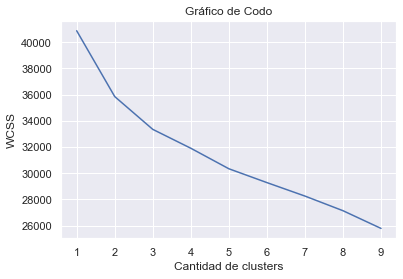

In [72]:
numeroClusters = range(1,10)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scale)
    wcss.append(kmeans.inertia_)

# Graficando
plt.plot(numeroClusters, wcss)
plt.xlabel("Cantidad de clusters")
plt.ylabel("WCSS")
plt.title("Gráfico de Codo")
plt.show()

Luego de obtener el gráfico de codo y analizarlo se determinó que se utilizarán 2 grupos ya que es donde se observa un codo mas pronunciado en el gráfico. Este cambio brusco indica el número óptimo de clusters.

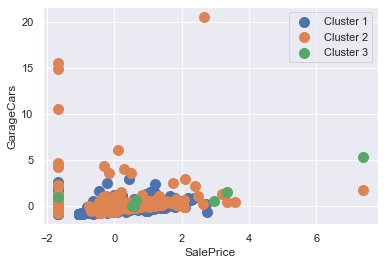

In [73]:
# Modelo obtenido de https://www.freecodecamp.org/espanol/news/8-algoritmos-de-agrupacion-en-clusteres-en-el-aprendizaje-automatico-que-todos-los-cientificos-de-datos-deben-conocer/, se usa el Modelo de Birch
birch_model = Birch(threshold=1.5, n_clusters=3)
birch_model.fit(X_scale)

# Obtenemos los puntos y los clusters
result= birch_model.predict(X_scale)

# Graficar los clusters
plt.scatter(X_scale[result== 0, 0], X_scale[result== 0, 1], s = 100, label = "Cluster 1")
plt.scatter(X_scale[result== 1, 0], X_scale[result== 1, 1], s = 100, label = "Cluster 2")
plt.scatter(X_scale[result== 2, 0], X_scale[result== 2, 1], s = 100, label = "Cluster 3")
plt.xlabel(columnsToUse[0])
plt.ylabel(columnsToUse[1])
plt.legend()
plt.show()

For n_clusters = 2 The average silhouette_score is: 0.14226266658978565
For n_clusters = 3 The average silhouette_score is: 0.1401498252219729


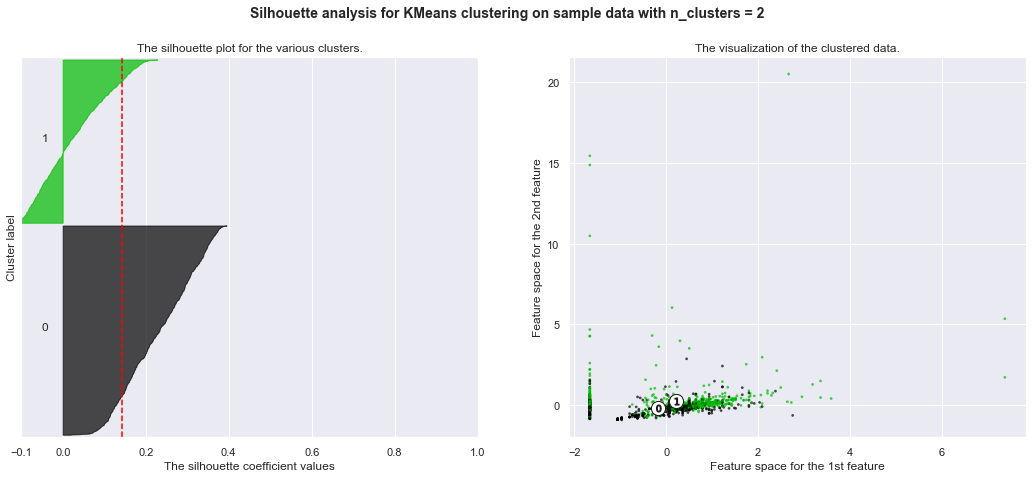

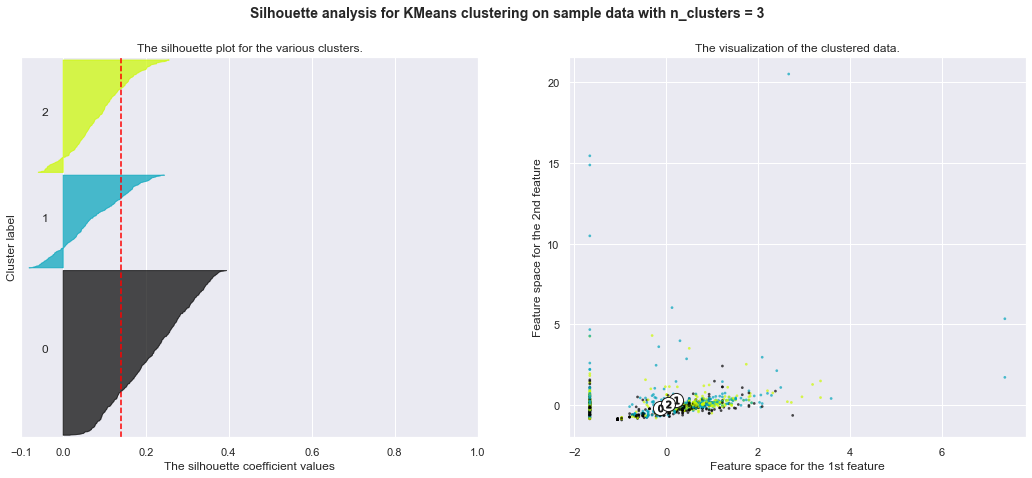

In [81]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans

range_n_clusters = [2, 3]

for n_clusters in range_n_clusters:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X_scale) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X_scale)

  silhouette_avg = silhouette_score(X_scale, cluster_labels)
  print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is:",
    silhouette_avg
  )

  sample_silhouette_values = silhouette_samples(X_scale, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(
          np.arange(y_lower, y_upper),
          0,
          ith_cluster_silhouette_values,
          facecolor=color,
          edgecolor=color,
          alpha=0.7,
      )

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(
      X_scale[:, 0], X_scale[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
  )

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(
      centers[:, 0],
      centers[:, 1],
      marker="o",
      c="white",
      alpha=1,
      s=200,
      edgecolor="k",
  )

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(
      "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
      % n_clusters,
      fontsize=14,
      fontweight="bold",
  )

plt.show()

De acuerdo a los gráficos de silueta observados anteriormente, el mejor número de clusters es 1. El valor de la silueta para 3 clusters es de 0.14226266658978565 aunque este sigue siendo un número muy bajo.

In [88]:
meanData =data.mean()
medianData = data.median()
print("Mean:", meanData)
print("\nMedian:", medianData)

Mean: Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
Sc

C:\Users\laury\AppData\Local\Temp\ipykernel_13468\2429694842.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meanData =data.mean()
C:\Users\laury\AppData\Local\Temp\ipykernel_13468\2429694842.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianData = data.median()


El análisis de BIRCH muestra los mejores resultados gráficamente, y la gráfica de silueta provee un valor de la silueta que apoya esta decisión.

## Variable respuesta
permite clasificar las casas  en Económicas, Intermedias o Caras. -Pineda


In [10]:
data.fillna(0)
minPrice = data['SalePrice'].min()
maxPrice = data['SalePrice'].max()
divs = (maxPrice - minPrice) / 3
data['priceRange'] = data['LotArea']

data['priceRange'][data['SalePrice'] < minPrice + divs] = 'eco'
data['priceRange'][data['SalePrice'] >= minPrice + divs] = 'mid'
data['priceRange'][data['SalePrice'] >= minPrice + divs * 2] = 'expensive'

C:\Users\juanp\AppData\Local\Temp\ipykernel_2644\1474497040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['priceRange'][data['SalePrice'] < minPrice + divs] = 'eco'
C:\Users\juanp\AppData\Local\Temp\ipykernel_2644\1474497040.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['priceRange'][data['SalePrice'] >= minPrice + divs] = 'mid'
C:\Users\juanp\AppData\Local\Temp\ipykernel_2644\1474497040.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

## Entrenamiento y prueba
Descripción del criterio que se usó para crear los conjuntos: número de filas de cada uno, estratificado o no, balanceado o no, etc. -Pineda

In [11]:
Y = data['priceRange']
X = data.drop(['priceRange'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7)
y_train.head(30)

918           eco
944           eco
691     expensive
1377          eco
406           eco
927           eco
1072          eco
1215          eco
941           eco
949           eco
1288          mid
186           eco
1087          eco
894           eco
547           eco
1173          eco
1443          eco
853           eco
1376          eco
245           eco
1240          eco
222           eco
235           eco
45            mid
864           eco
652           eco
1258          eco
363           eco
304           mid
671           eco
Name: priceRange, dtype: object

# Árbol de clasificación
Muestre el modelo gráficamente. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código. - Martin

In [ ]:
temp = data[quant]
temp = temp.dropna()
y = temp.pop("SalePrice")
quant.remove("SalePrice")
x = temp[quant]

random.seed(579)

1195

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

In [ ]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42)
arbol = arbol.fit(x_train, y_train)

In [ ]:
tree.plot_tree(arbol, feature_names=data.columns, filled=True)

In [ ]:
y_pred = arbol.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))

## Árbol de regresión
para predecir el precio de las viviendas utilizando el conjunto 
de entrenamiento. Muestre el modelo gráficamente. 
El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código. -Laura

In [ ]:
regressionTree = DecisionTreeRegressor(max_depth=4, random_state=42) 
regressionTree = regressionTree.fit(x_train, y_train) 

[Text(0.5, 0.9, 'YearBuilt <= 2.5\nsquared_error = 6821301052.994\nsamples = 836\nvalue = 181073.514'),
 Text(0.25, 0.7, 'LotConfig <= 1413.0\nsquared_error = 2961449844.66\nsamples = 711\nvalue = 159390.975'),
 Text(0.125, 0.5, 'Alley <= 1050.5\nsquared_error = 1185066146.488\nsamples = 381\nvalue = 130651.701'),
 Text(0.0625, 0.3, 'YearRemodAdd <= 225.0\nsquared_error = 718230957.245\nsamples = 259\nvalue = 116569.371'),
 Text(0.03125, 0.1, 'squared_error = 633130435.123\nsamples = 46\nvalue = 91347.913'),
 Text(0.09375, 0.1, 'squared_error = 569562445.966\nsamples = 213\nvalue = 122016.258'),
 Text(0.1875, 0.3, 'Condition1 <= 1.5\nsquared_error = 861351170.589\nsamples = 122\nvalue = 160547.795'),
 Text(0.15625, 0.1, 'squared_error = 668244417.291\nsamples = 73\nvalue = 147987.521'),
 Text(0.21875, 0.1, 'squared_error = 563861739.468\nsamples = 49\nvalue = 179260.041'),
 Text(0.375, 0.5, 'YearRemodAdd <= 480.5\nsquared_error = 2957808167.024\nsamples = 330\nvalue = 192571.773'),
 Te

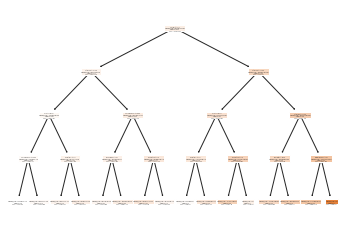

In [68]:
tree.plot_tree(regressionTree, feature_names=data.columns, filled=True)

## Ánalisis de eficiencia
Usando una matriz de confusión para el árbol de clasificación. -Martin

In [ ]:
print("Matriz de confusion\n", confusion_matrix(y_test, y_pred))
print("Accuracy score\n", metrics.accuracy_score(y_test, y_pred))
print("Recall score\n", metrics.recall_score(y_test, y_pred, average=None))
print("Precision score\n", metrics.precision_score(y_test, y_pred, average=None))
print("f1 score\n", metrics.f1_score(y_test, y_pred, average=None))

## Análisis del desempeño del árbol de regresión 
-pineda

## Utilice random  forest
Explique  sus resultados comparando ambos algoritmos.  -Martin

In [ ]:
X, y = datasets.make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
modelo = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )
modelo.fit(x_train, y_train)
predicciones = modelo.predict(X=x_test)
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("El error rmse de test es", rmse)
clf.predict([[0, 0, 0, 0]])

El error rmse de test es 38375.43772622446


C:\Users\reque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


array([1])